# **Movie Ratings: Exploratory Analysis**

Thinking about catching a film? It’s reasonable to ask **how much you can trust online ratings**, especially when the site displaying the score **also sells the tickets**. That overlap could introduce **incentives to inflate scores**.

Author of the project is Kevin Molloy.

### a. all_sites_scores.csv

- Includes films with ratings from **Rotten Tomatoes (critics & users)**, **Metacritic (critics & users)**, and **IMDb**.  
- Restricted to titles with **at least 30 Fandango fan reviews**.  
- **Fandango data snapshot:** **August 24, 2015**.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

### b. fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

**Import any libraries:**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [10]:
fandango = pd.read_csv("../data/fandango_scrape.csv")
all_sites = pd.read_csv("../data/all_sites_scores.csv")

**Explore the DataFrame Properties and Head.**

In [11]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [12]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [15]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

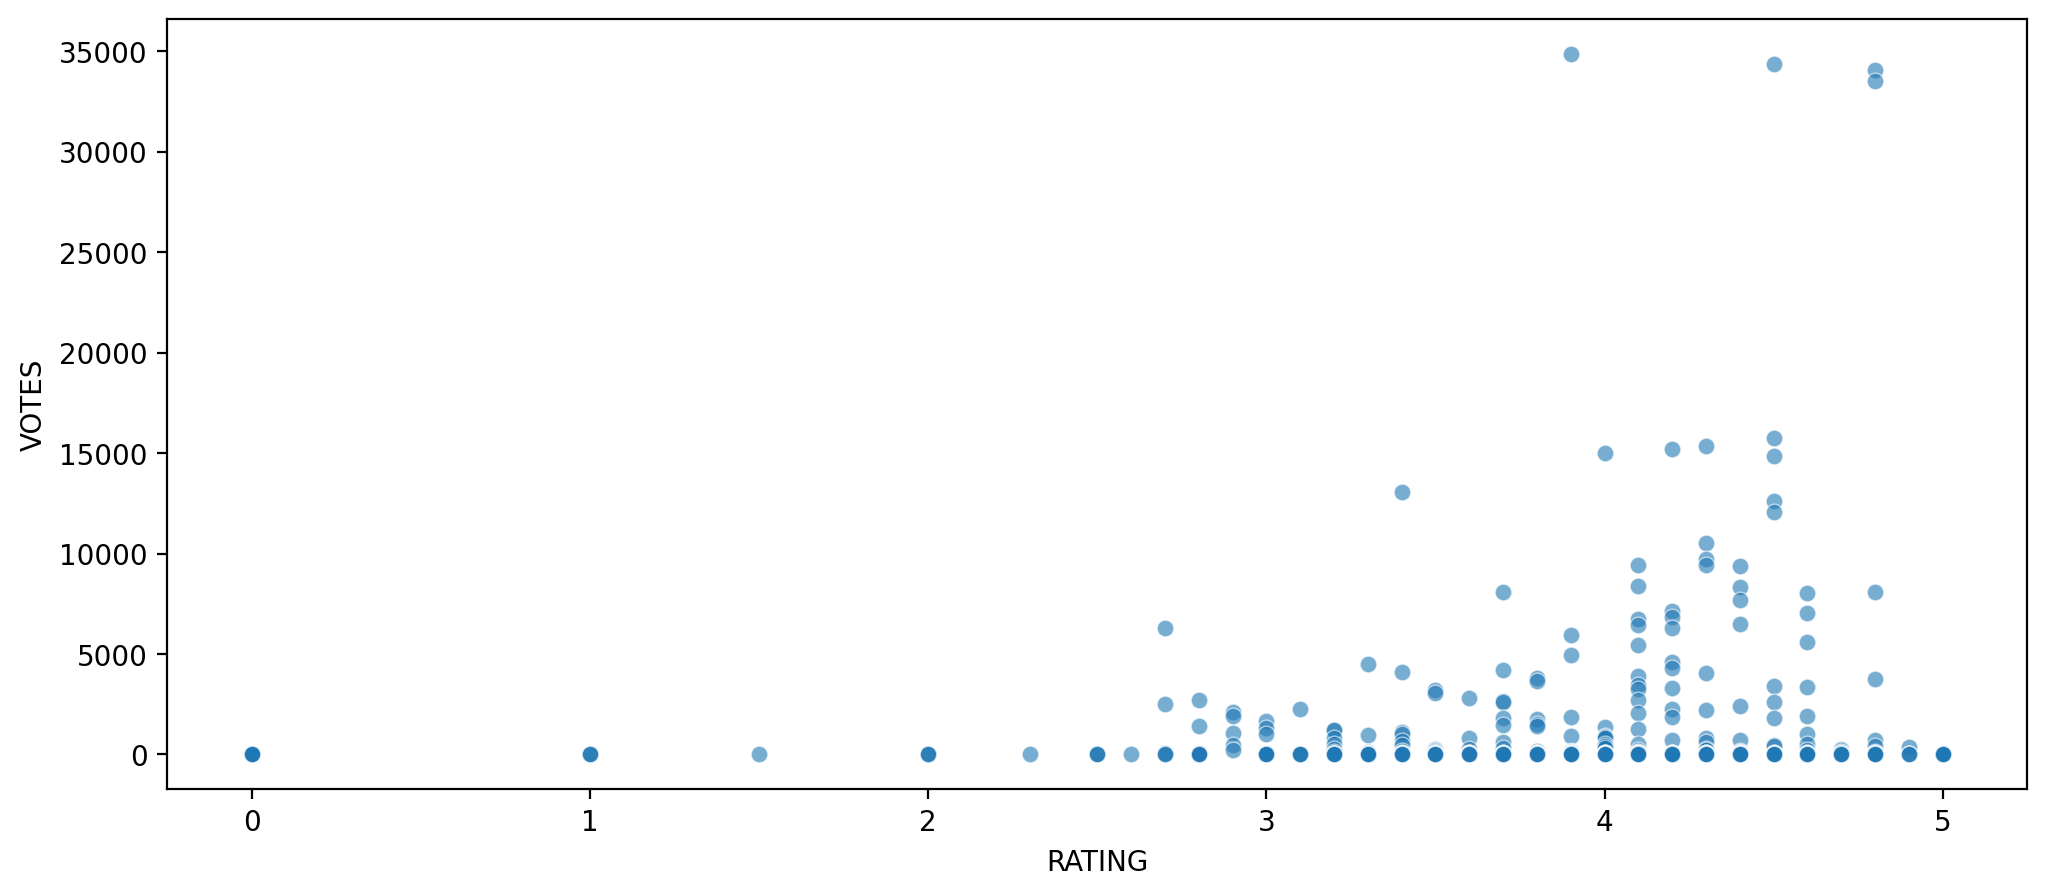

In [16]:
plt.figure(figsize=(12,5), dpi=200)
sns.scatterplot(x='RATING', y='VOTES', data=fandango, alpha=0.6)
plt.show()

---

**Calculate the correlation between the columns:**

In [26]:
corr = fandango.select_dtypes(include='number').corr(method='pearson')
print(corr)

           STARS    RATING     VOTES
STARS   1.000000  0.994696  0.164218
RATING  0.994696  1.000000  0.163764
VOTES   0.164218  0.163764  1.000000


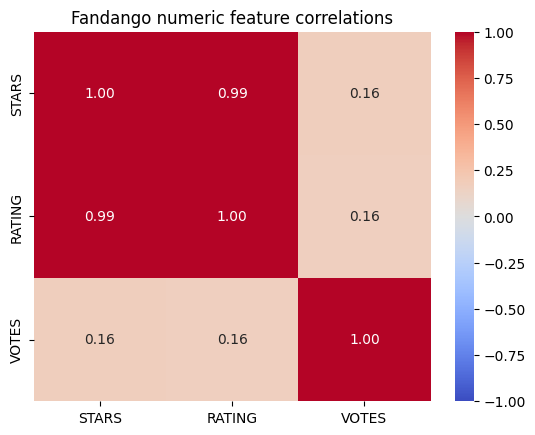

In [31]:
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Fandango numeric feature correlations")
plt.show()

**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [27]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: x[-5:-1])
fandango['YEAR'] = pd.to_datetime(fandango['YEAR']).dt.year

In [28]:
fandango.head()
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   YEAR    504 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 17.8+ KB


---

**How many movies are in the Fandango DataFrame per year?**

In [29]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

---

**Visualise the count of movies per year with a plot:**

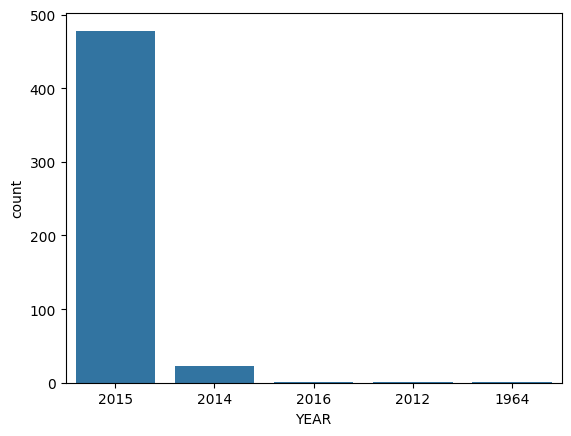

In [30]:
sns.countplot(x='YEAR', data=fandango, order=[2015, 2014, 2016, 2012, 1964])
plt.show()

---

**What are the 10 movies with the highest number of votes?**

In [32]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


---

**How many movies have zero votes?**

In [33]:
zero_votes = fandango['VOTES'] == 0

zero_votes.sum()

np.int64(69)

---

**Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [34]:
reviewed_movies = fandango[fandango['VOTES'] > 0]
reviewed_movies.tail()

,FILM,STARS,RATING,VOTES,YEAR
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015
434,Z For Zachariah (2015),5.0,5.0,1,2015


---

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

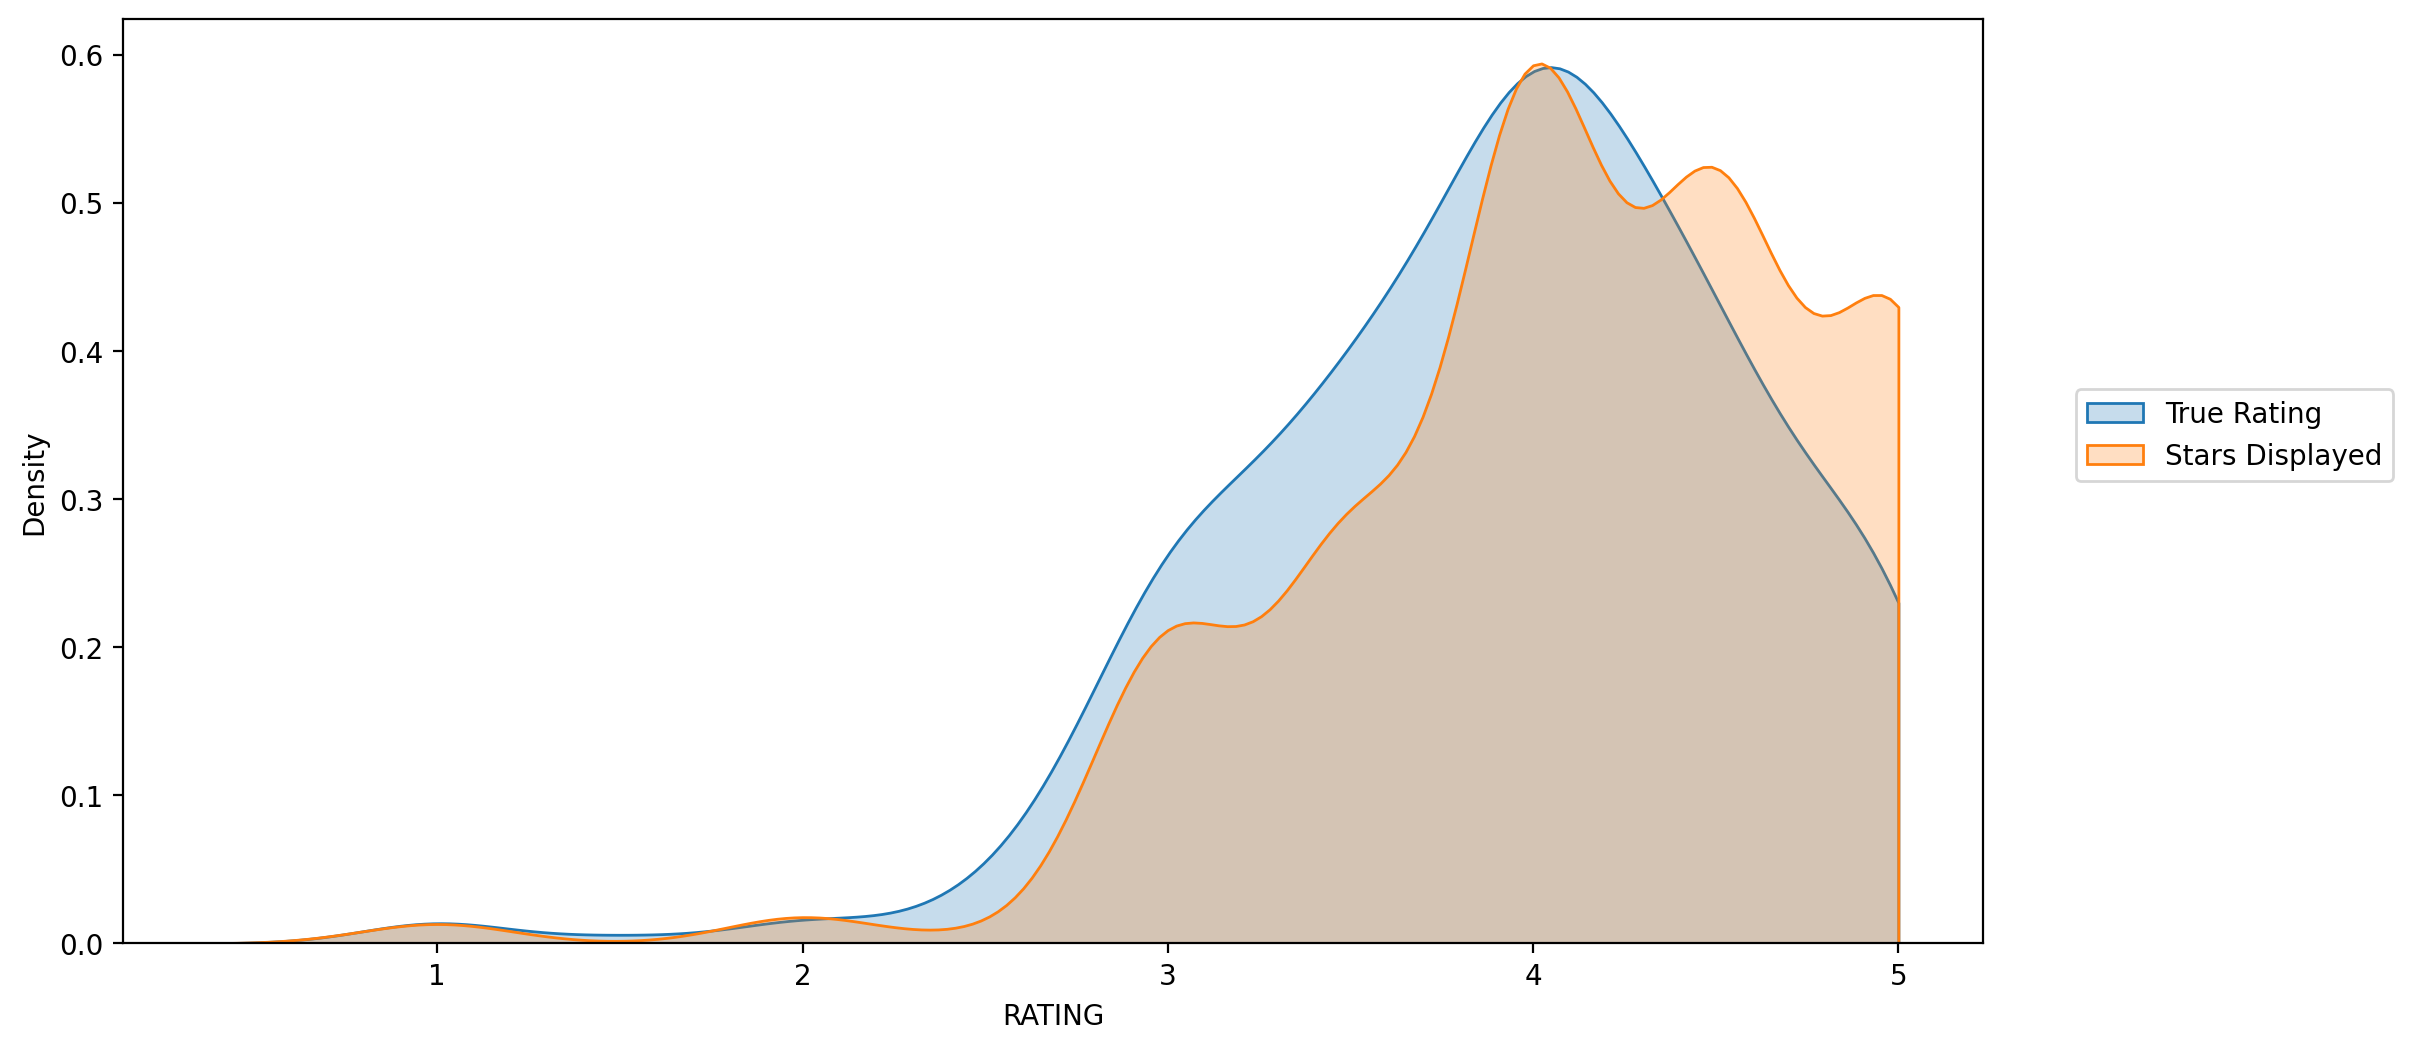

In [36]:
# KDEs for True Rating vs Stars Displayed
plt.figure(figsize=(12, 6), dpi=200)

sns.kdeplot(data=reviewed_movies, x='RATING', clip=(0, 5), fill=True, label='True Rating')
sns.kdeplot(data=reviewed_movies, x='STARS',  clip=(0, 5), fill=True, label='Stars Displayed')

plt.legend(loc=(1.05, 0.5))
plt.show()

True Rating -> Rating by votes

Stars Displayed -> Rating displayed to public

---

**Measure the gap between the displayed stars and the true rating. Add a column STARS - RATING and round it to one decimal place.**

In [39]:
 #1) Filter to movies with > 0 votes and make a copy
reviewed_movies = fandango.loc[fandango['VOTES'] > 0].copy()

# 2) Add the difference column (STARS - RATING), rounded to 1 decimal
reviewed_movies['STARS_DIFF'] = (reviewed_movies['STARS'] - reviewed_movies['RATING']).round(1)

# 3) Quick check
reviewed_movies[['FILM', 'STARS', 'RATING', 'VOTES', 'STARS_DIFF']].head()

,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0


---

**Create a count plot to display the number of times a certain difference occurs:**

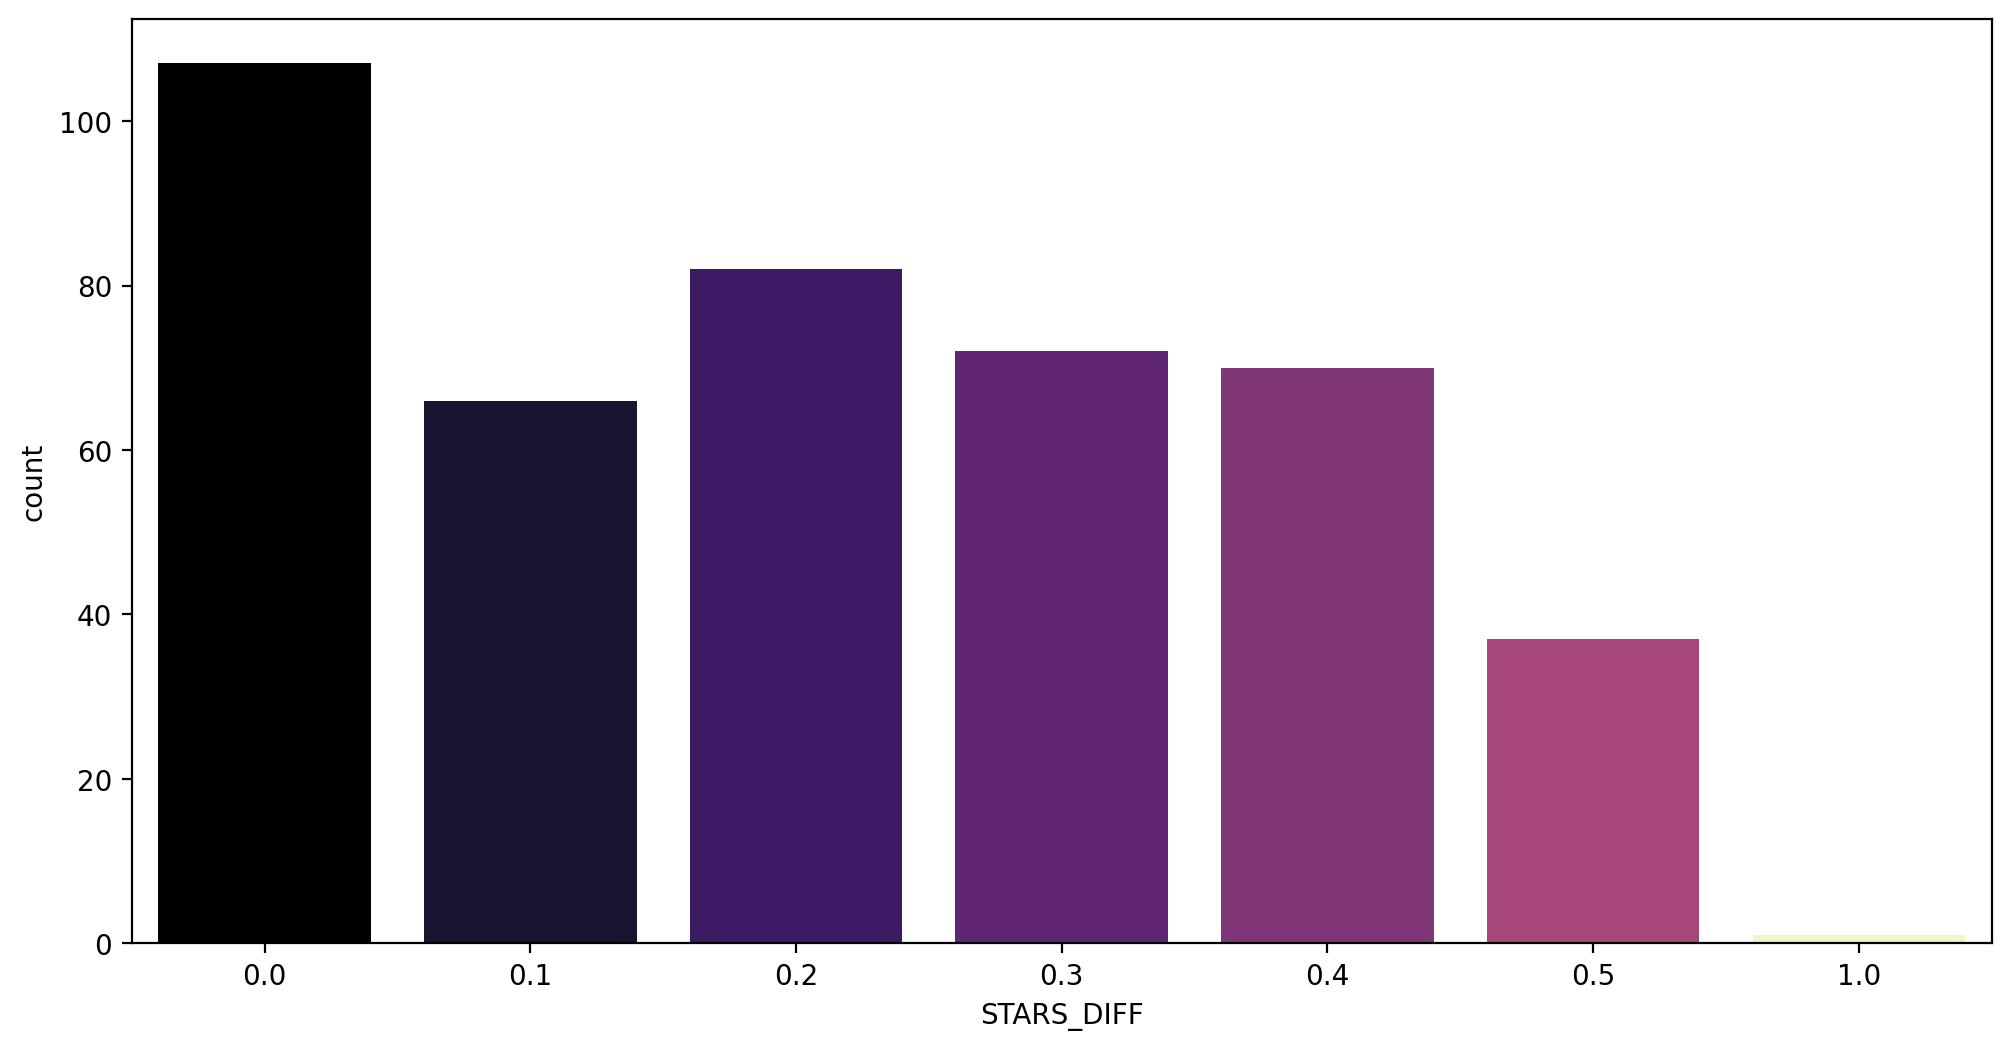

In [41]:
plt.figure(figsize=(12, 6), dpi=200)
ax = sns.countplot(
    data=reviewed_movies,
    x='STARS_DIFF',
    hue='STARS_DIFF',          # add hue so palette is valid
    palette='magma'
)
ax.legend_.remove()            # hide redundant legend
plt.show()

In [42]:
reviewed_movies['STARS_DIFF'].value_counts()

STARS_DIFF
0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: count, dtype: int64

---

**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [43]:
reviewed_movies[reviewed_movies['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [44]:
all_sites = pd.read_csv("../data/all_sites_scores.csv")

**TASK: Explore the DataFrame columns, info, description.**

In [45]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [46]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [47]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

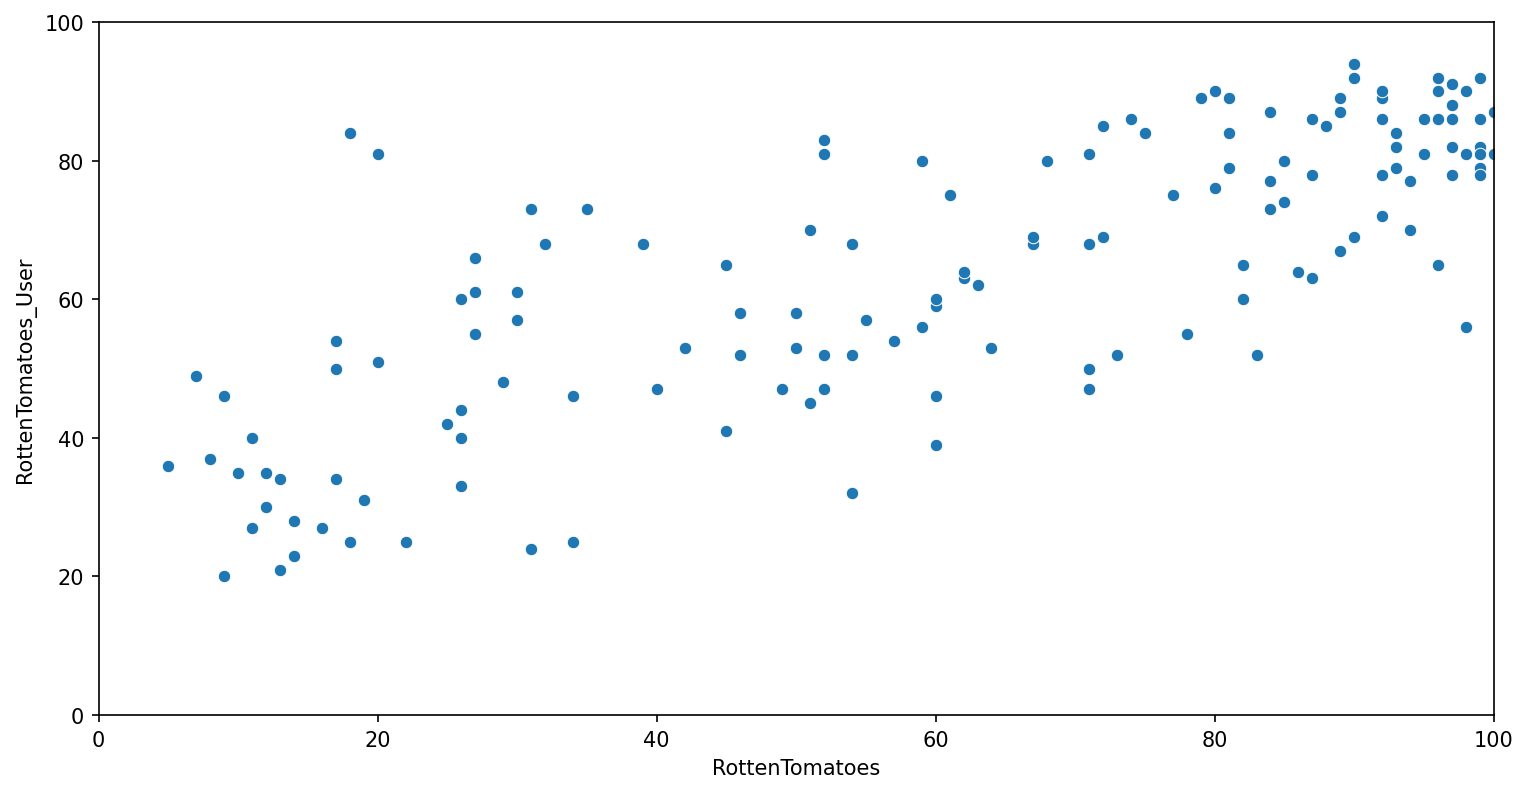

In [48]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

---

**Measure the critic–audience gap on Rotten Tomatoes.**  
Create a column `Rotten_Diff = RottenTomatoes - RottenTomatoes_User`.

- **≈ 0** → critics and users largely agree.  
- **> 0** → critics rated the movie **higher** than users.  
- **< 0** → users rated the movie **higher** than critics.

**Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [49]:
all_sites['Rotten_Diff'] = round(all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'],1)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


---

**Compare the overall gap size.**  
Take the absolute value of each difference (so negatives don’t cancel positives), then compute the mean:

- Compute `abs(Rotten_Diff)` for every film  
- Take the average → **mean absolute critic–user difference**

In [50]:
RT_abs_diff_mean = abs(all_sites['Rotten_Diff']).mean()
RT_abs_diff_mean

np.float64(15.095890410958905)

---

**Plot the distribution of the differences between RT Critics Score and RT User Score.**

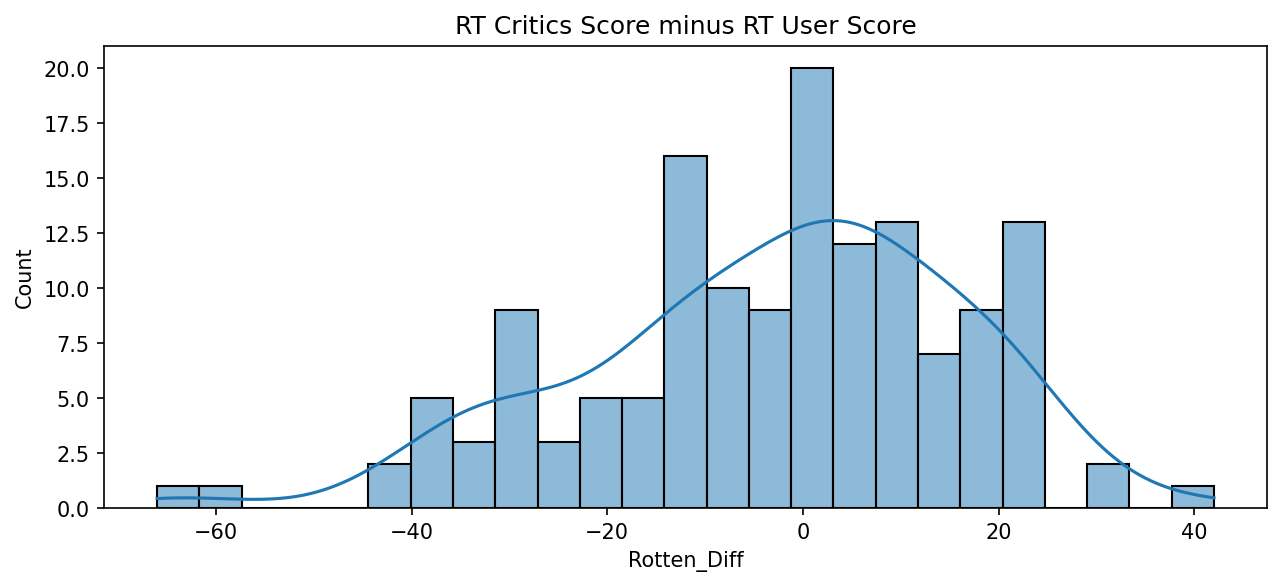

In [51]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(x='Rotten_Diff', data=all_sites, kde=True, bins=25)
plt.title('RT Critics Score minus RT User Score')
plt.show()

The majority of lowest difference in movies rating of RT is around 0.

The majority of difference is between -15 and 15, but the RT user ratings is tend to gives higher score than RT ratings (RT critics score)

---

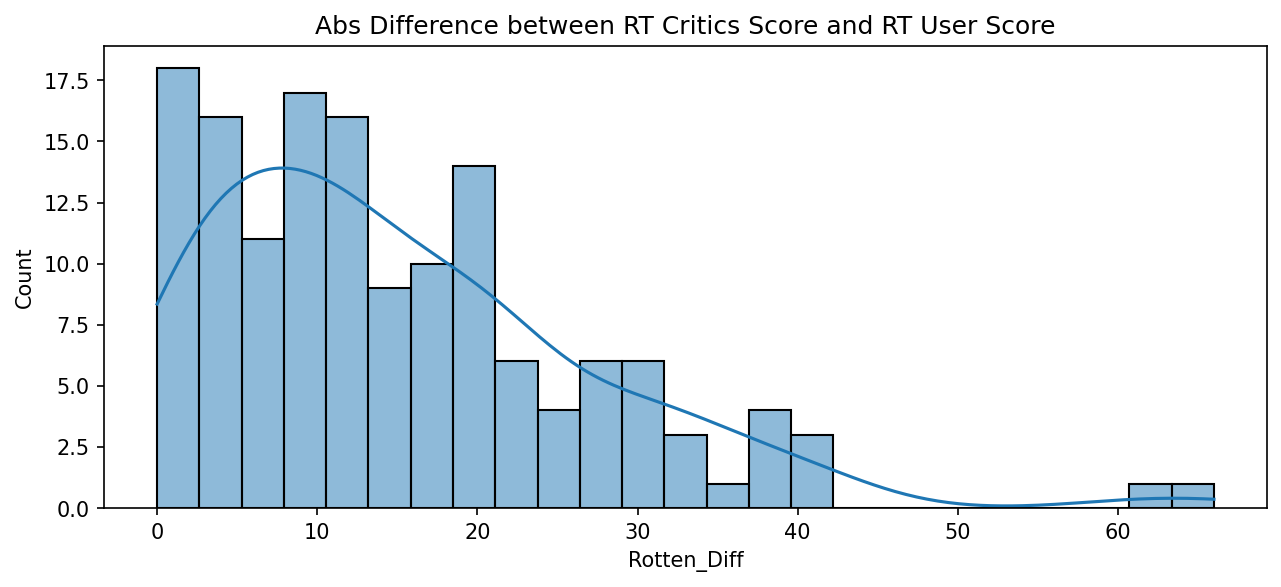

In [52]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), data=all_sites, kde=True, bins=25)
plt.title('Abs Difference between RT Critics Score and RT User Score')
plt.show()

---

**Find the biggest user-over-critic gaps (most negative).**  
With `Rotten_Diff = Critics - Users`, sort `Rotten_Diff` **ascending** and take the top 5.

- Large **negative** values → users rated much **higher** than critics.
- Report the 5 most negative titles.

**What are the top 5 movies users rated higher than critics on average:**

In [53]:
print('Users Love but Critics Hate')
# Select movies that RT User Rating > RT Rating
user_top_5_movies = all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]
user_top_5_movies

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


---

**Now show the top 5 movies critics scores higher than users on average.**

In [54]:
print('Critics love, but Users Hate')
# Select movies that RT User Rating < RT Rating
RTcritics_top_5_movies = all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]
RTcritics_top_5_movies

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


---

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

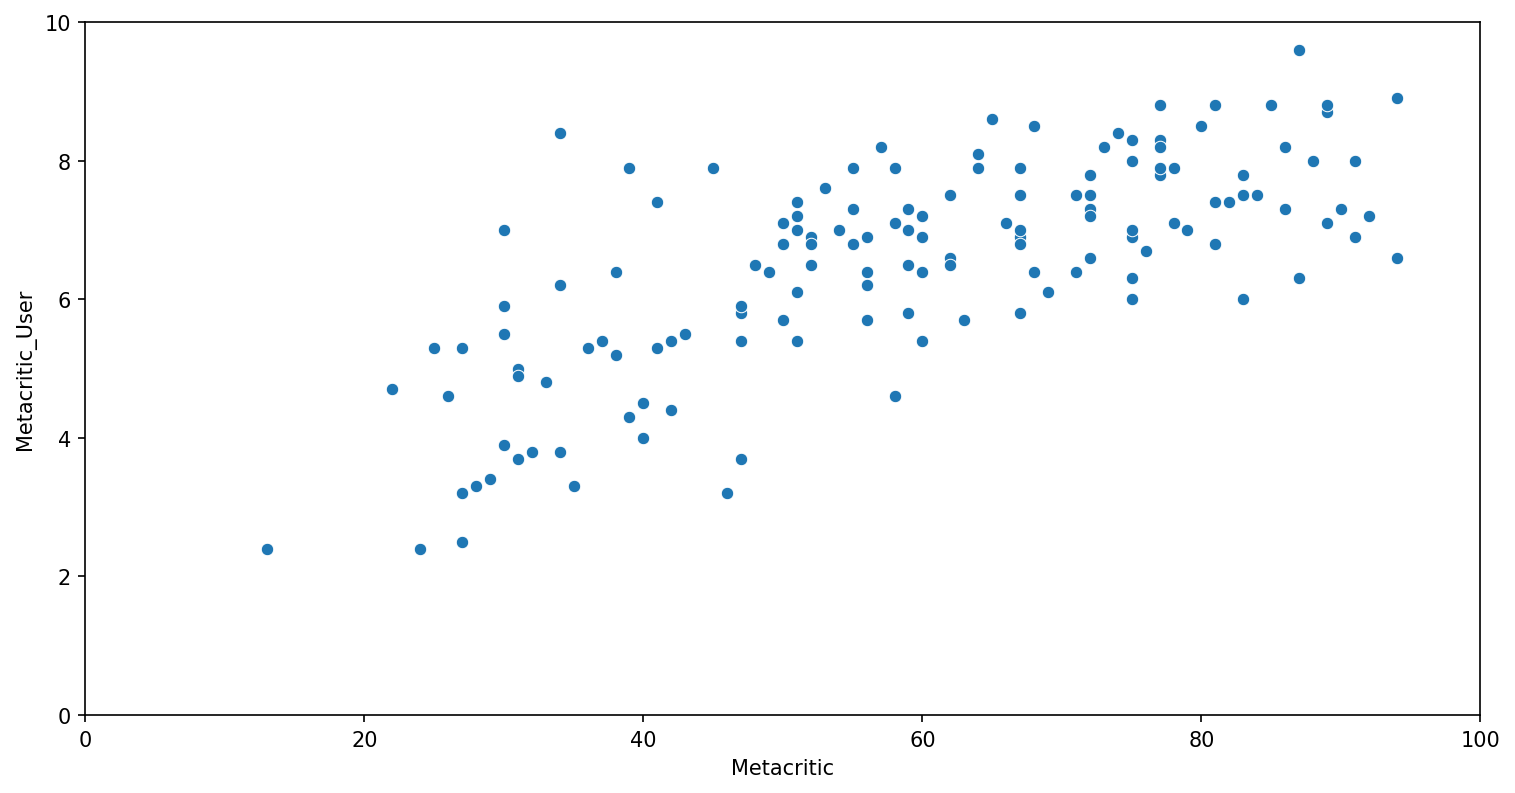

In [55]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites)
plt.xlim(0,100)
plt.ylim(0,10)
plt.show()

---

**IMDB vs Metacritic popularity.**  
Make a scatter plot of **Metacritic_user_vote_count** (x) vs **IMDB_user_vote_count** (y) to compare vote volumes across sites. Each point is a film; a dense upper-right cluster indicates broadly popular titles.

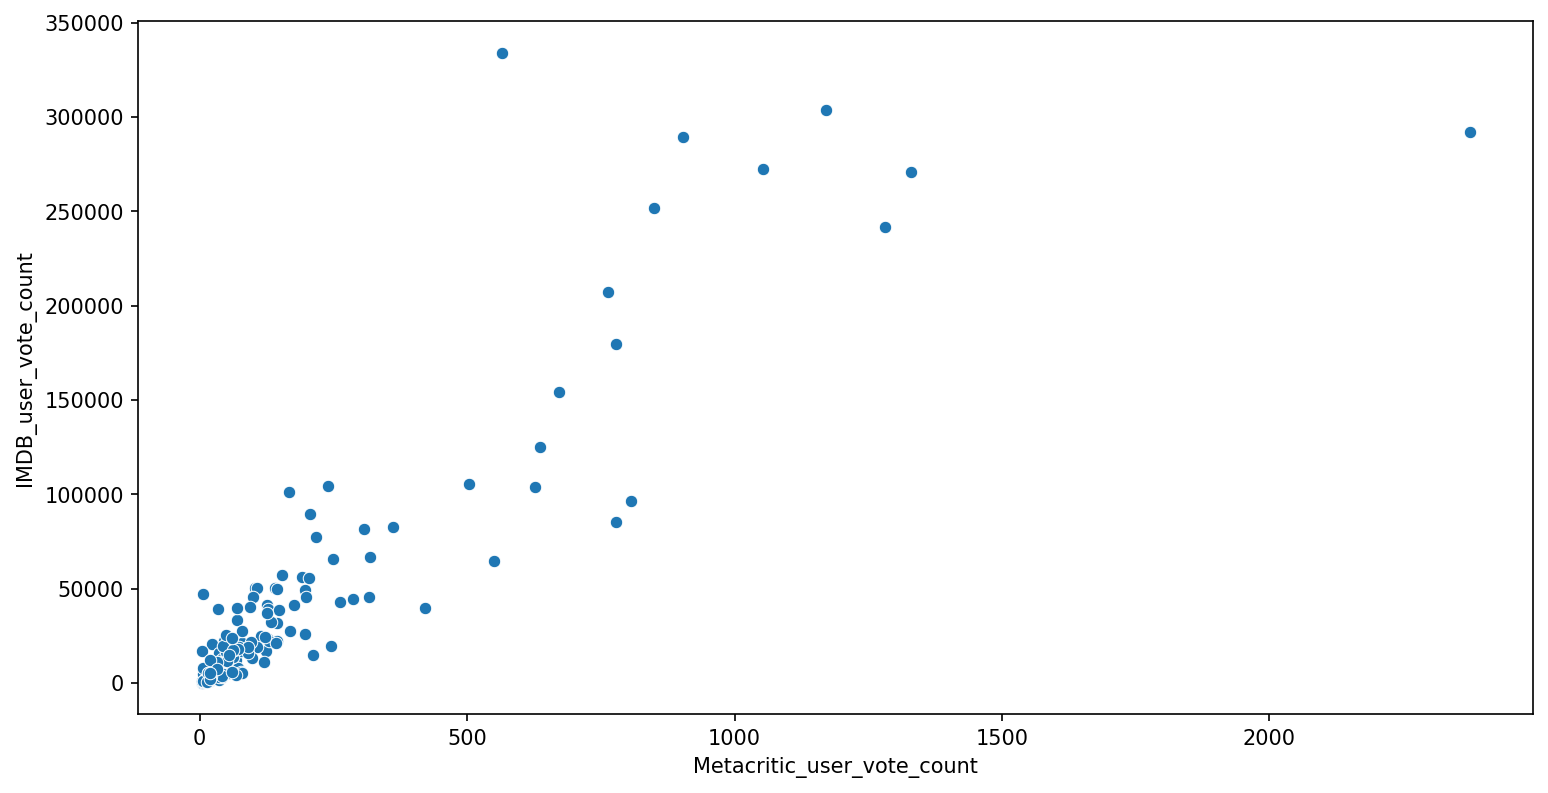

In [56]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites)
#plt.xlim(0,100)
#plt.ylim(0,10)
plt.show()

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

In [59]:
highest_IMDB_user_vote = all_sites.nlargest(1, 'IMDB_user_vote_count')
highest_IMDB_user_vote

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


---

**What movie has the highest Metacritic User Vote count?**

In [60]:
highest_Metacritic_user_vote = all_sites.nlargest(1, 'Metacritic_user_vote_count')
highest_Metacritic_user_vote

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


---

## **Do Fandango’s displayed scores run high?**

To test this fairly, compare only movies that exist in **both** data sets.

**Step:** perform an **inner join** on the title column **`FILM`** so we keep the intersection of titles (some Fandango entries have few/no external reviews).

Example: `merged = pd.merge(fandango, all_sites, how="inner", on="FILM")`

In [62]:
rating_df = pd.merge(reviewed_movies, all_sites, how='inner', on='FILM')

In [63]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int32  
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [64]:
rating_df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


---

## **Put all sites on the same 0–5 scale**

Different sites rate on different ranges (RT/Metacritic: 0–100, IMDb/Metacritic User: 0–10).  
To compare fairly with Fandango (0–5 stars), create normalized columns:

- **RT (critics)** → `RT_5 = RottenTomatoes / 20`
- **RT (users)** → `RT_User_5 = RottenTomatoes_User / 20`
- **Metacritic (critics)** → `MC_5 = Metacritic / 20`
- **Metacritic (users)** → `MC_User_5 = Metacritic_User / 2`
- **IMDb (users)** → `IMDB_5 = IMDB / 2`

These keep the relative relationships but place every score on a common **0–5** star scale.

In [65]:
rating_df['RT_Norm'] = round(rating_df['RottenTomatoes']/20,1)
rating_df['RTU_Norm'] = round(rating_df['RottenTomatoes_User']/20,1)
rating_df['Meta_Norm'] = round(rating_df['Metacritic']/20,1)
rating_df['MetaU_Norm'] = round(rating_df['Metacritic_User']/2,1)
rating_df['IMDB_Norm'] = round(rating_df['IMDB']/2,1)

In [66]:
rating_df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


---

**Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [67]:
norm_rating = rating_df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm']]
norm_rating.head()
norm_rating.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm',
       'IMDB_Norm'],
      dtype='object')

---

## **Are Fandango’s scores higher than the rest?**

We’ve already seen `STARS > RATING` on Fandango. Now compare Fandango to the other sites on the same 0–5 scale.

**Task:** plot the distributions of the normalized columns  
(e.g., **FANDANGO: `RATING`**, **RT_5**, **RT_User_5**, **MC_5**, **MC_User_5**, **IMDB_5**).

**What to look for:** if Fandango’s curve/box is **shifted right** relative to others, that suggests systematically higher displayed ratings.

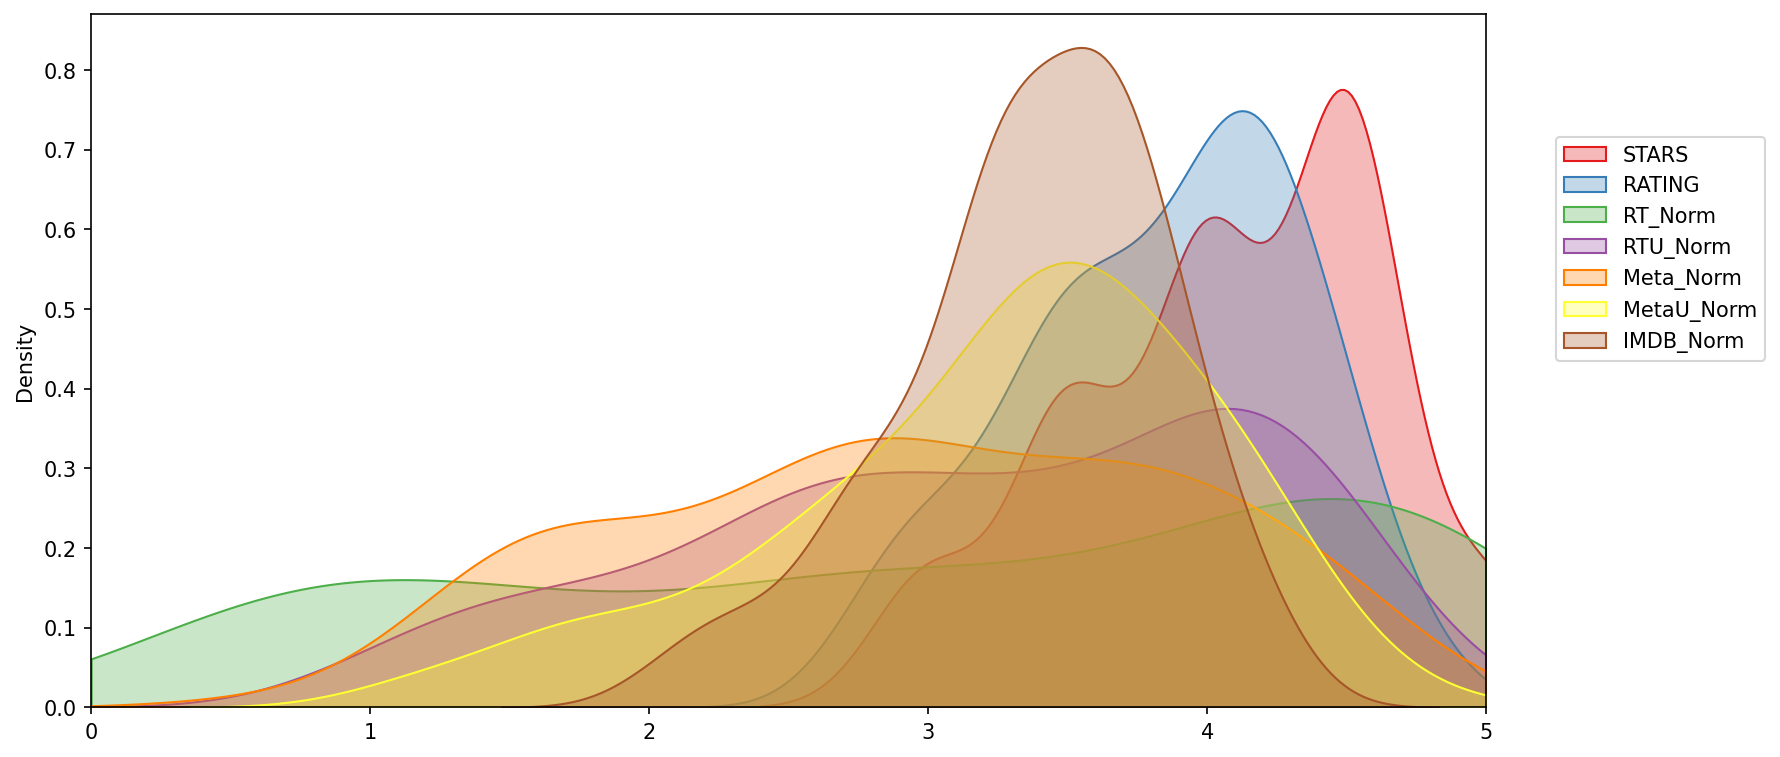

In [69]:
sns.set_palette('Set1')  # optional: choose colors for the cycle

plt.figure(figsize=(12, 6), dpi=150)
for column in norm_rating.columns:
    sns.kdeplot(
        data=norm_rating, x=column,
        clip=(0, 5), fill=True, alpha=0.3,   # shade→fill; add a little transparency
        label=column, common_norm=False
    )
plt.xlim(0, 5)
plt.xlabel('')
plt.legend(loc=(1.05, 0.5))
plt.show()

**Clearly Fandango have an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.**

---

**A KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

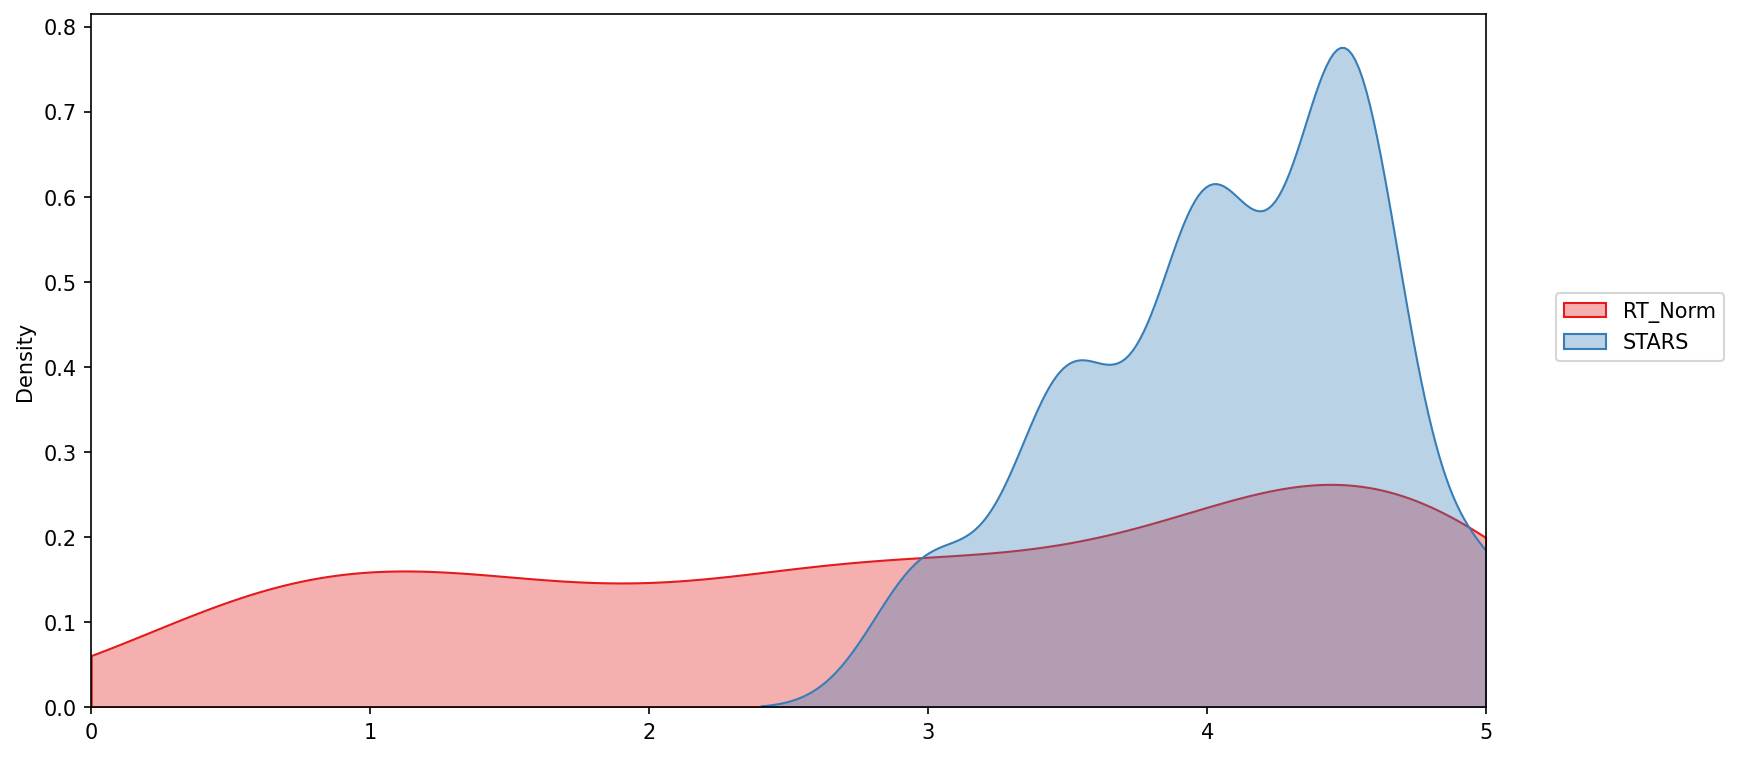

In [71]:
plt.figure(figsize=(12, 6), dpi=150)
sns.kdeplot(data=norm_rating, x='RT_Norm', clip=(0, 5), fill=True, alpha=0.35, label='RT_Norm')
sns.kdeplot(data=norm_rating, x='STARS',   clip=(0, 5), fill=True, alpha=0.35, label='STARS')
plt.xlim(0, 5)
plt.xlabel('')
plt.legend(loc=(1.05, 0.5))
plt.show()

**Distribution takeaway:**  
Rotten Tomatoes (critics) looks fairly even across the range, while **Fandango is right-skewed**, clustering toward higher scores.

---

**A histplot comparing all normalized scores.**

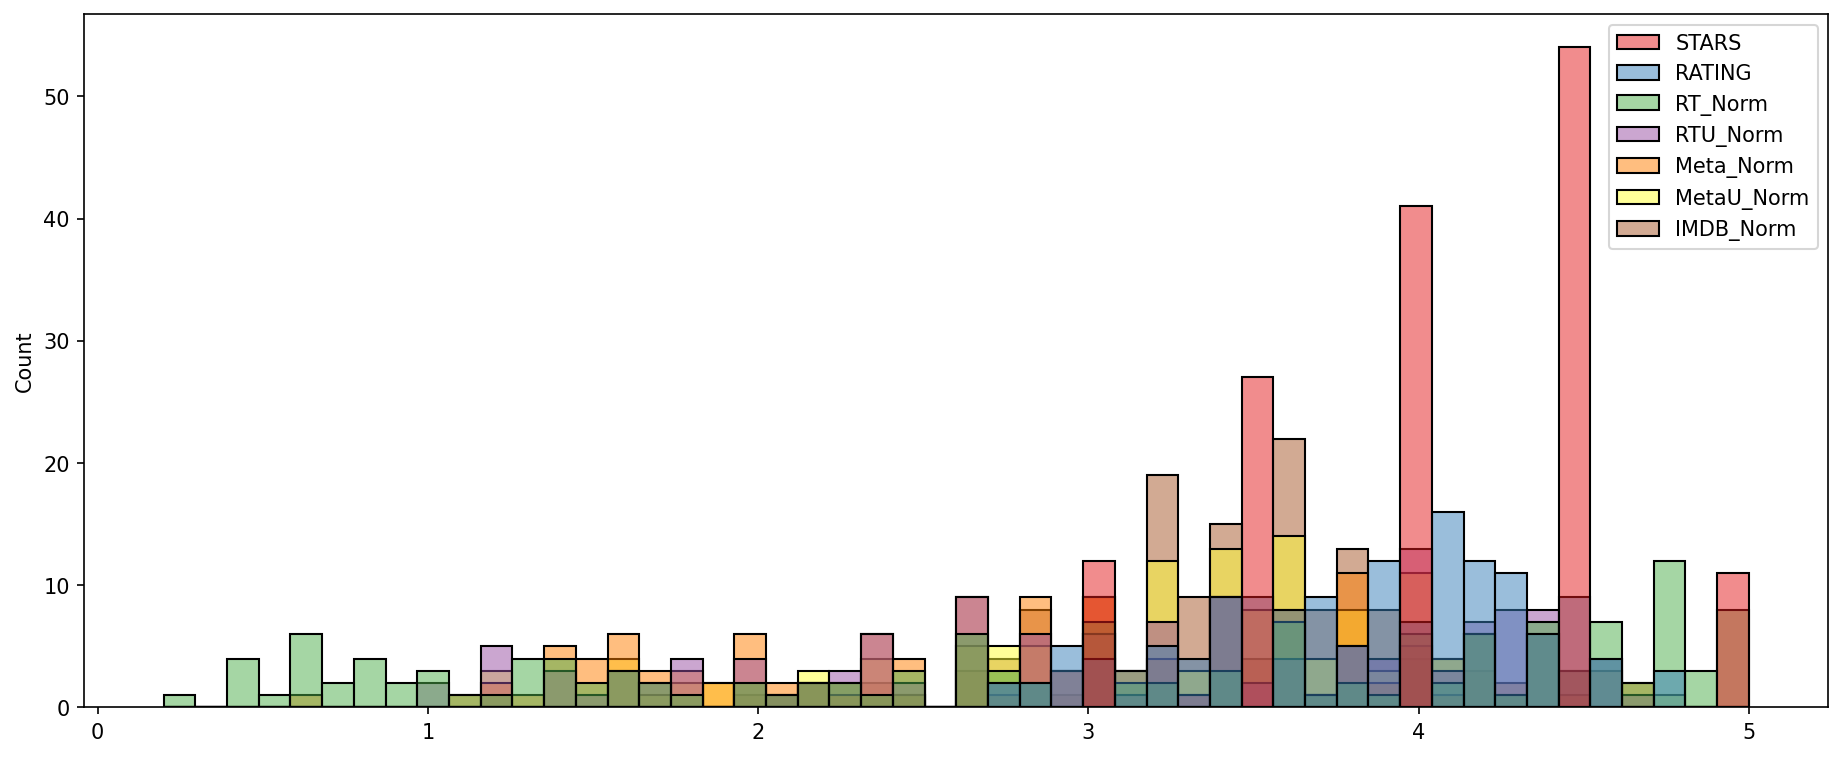

In [72]:
plt.subplots(figsize=(15,6), dpi=150)
sns.histplot(norm_rating, bins=50)
plt.show()

**Fandango’s displayed `STARS` skew high**—the site’s star ratings are generally above comparable scores.

---

**Cluster the normalized ratings.**  
Make a Seaborn `clustermap` using the 0–5 scaled columns (rows = films, columns = sites).  
Expectation: consistently high-scoring films cluster together, and low-scoring films form their own group.

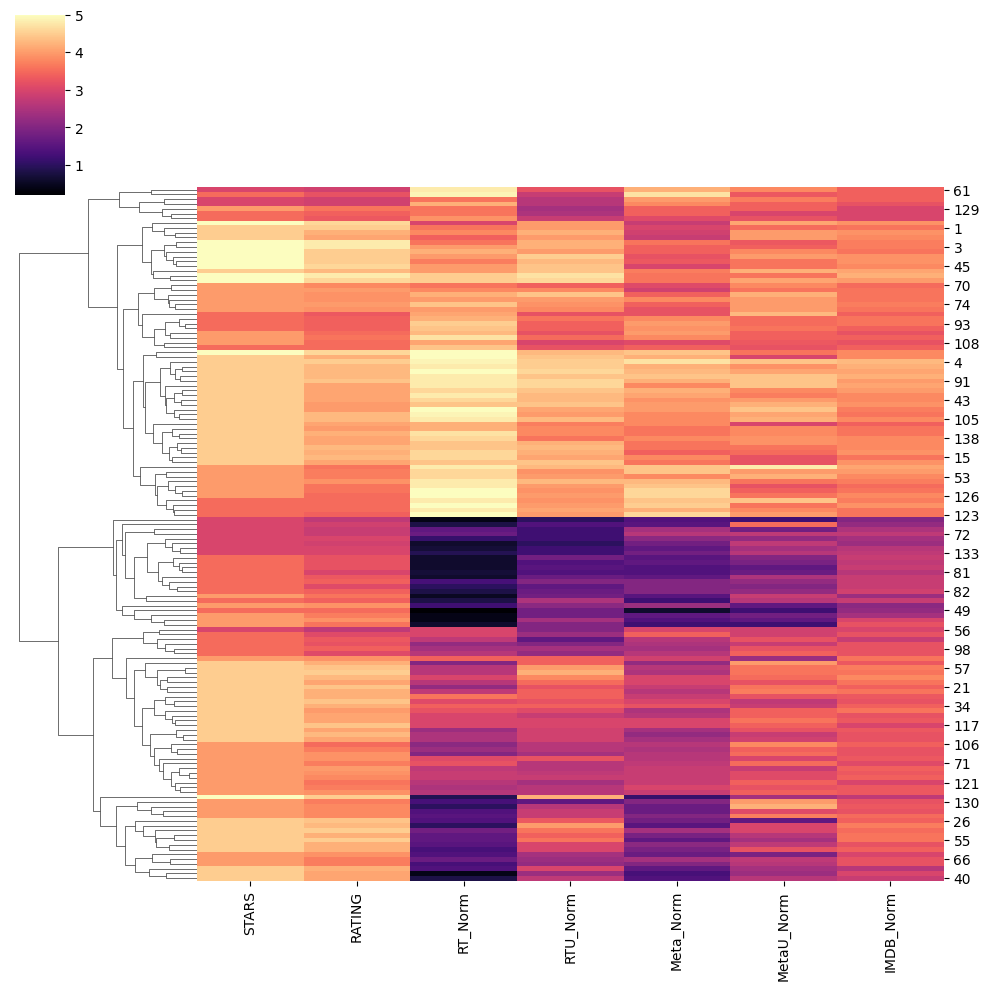

In [73]:
sns.clustermap(norm_rating, col_cluster=False, cmap='magma')
plt.show()

**Conclusion:** Compared with the other sites, Fandango’s scores are consistently higher—and the displayed stars are also **rounded up**, making movies look even better.

---

**Bottom 10 by RT critics.**  
Select the 10 films with the lowest `RottenTomatoes` scores and show their 0–5 normalized ratings across all sites.  
(If the normalized table lost titles, reattach or merge the `FILM` column so the rows are labeled.)

In [74]:
#top_10_worst_movies = pd.merge(norm_rating, rating_df[['STARS', 'FILM']], how='inner', on='STARS')
column = ['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm', 'FILM']
top_10_worst_movies = rating_df.nsmallest(10, 'RT_Norm')[column]
top_10_worst_movies

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


---

**Visualise how each site scores the bottom-10 films.**  
For those titles, plot the distributions of their 0–5 normalized ratings across all sites (e.g., KDE/box/violin) to compare agreement on poorly rated movies.

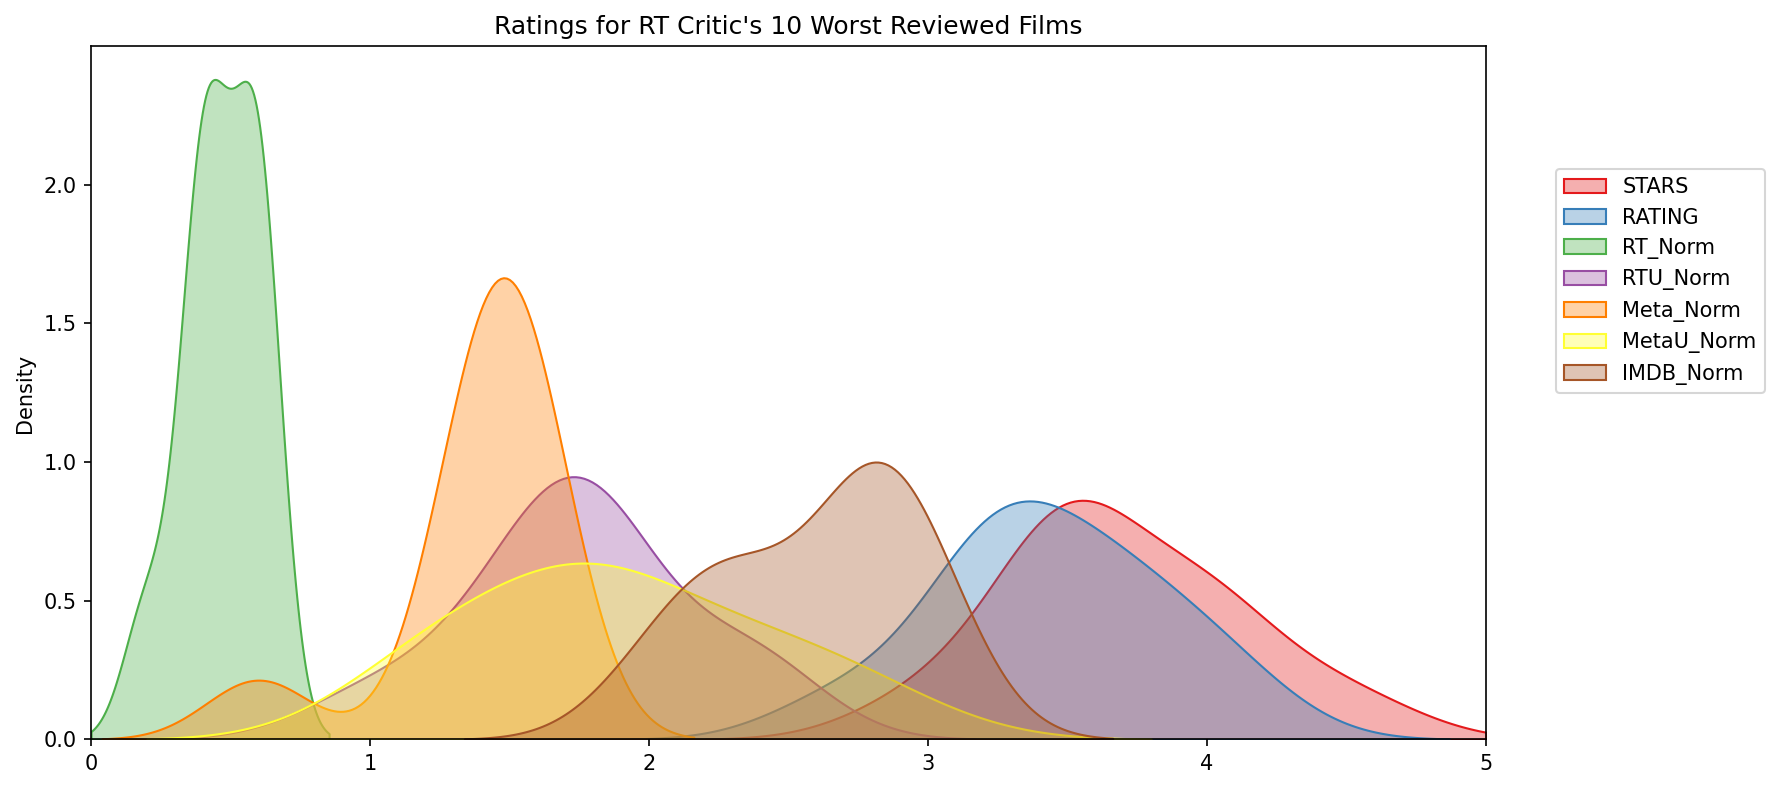

In [78]:
plt.figure(figsize=(12, 6), dpi=150)

for col in top_10_worst_movies.select_dtypes(include='number').columns:
    sns.kdeplot(
        data=top_10_worst_movies, x=col,
        clip=(0, 5), fill=True, alpha=0.35, label=col, common_norm=False
    )

plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")
plt.xlim(0, 5)
plt.xlabel('')
plt.legend(loc=(1.05, 0.5))
plt.show()

**Final take:** Several poorly reviewed films still appear with **3–4 stars on Fandango**. A striking example is [Taken 3](https://www.youtube.com/watch?v=tJrfImRCHJ0): shown as **4.5 stars on Fandango** despite an average near **1.86** across other platforms ([source](https://en.wikipedia.org/wiki/Taken_3#Critical_response)).

In [76]:
top_10_worst_movies.iloc[1]

STARS                    4.5
RATING                   4.1
RT_Norm                  0.4
RTU_Norm                 2.3
Meta_Norm                1.3
MetaU_Norm               2.3
IMDB_Norm                3.0
FILM          Taken 3 (2015)
Name: 25, dtype: object

In [77]:
# Average "Taken 3" rating of all sites except Fandango
average_rating = (0.4+2.3+1.3+2.3+3)/5
average_rating

1.86